In [1]:
import pandas as pd
import seaborn as sns
import json

from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)

import plotly.express as px

# CORONA

In [41]:
freq = "4epochs"
study = "corona"
with open(f"../config/features.txt") as f:
    features = json.load(f)

FEATURES = features[study][freq]
id_cols = ["subject_id", "date", "dayofweek"]
raw_behavior_vector = pd.read_csv(
    f"/m/cs/work/luongn1/digirhythm/data/processed/corona/vector_corona_{freq}.csv",
    index_col=0,
)

raw_behavior_vector.dropna(subset=FEATURES, inplace=True)
raw_behavior_vector["date"] = pd.to_datetime(raw_behavior_vector["date"])
raw_behavior_vector["dayofweek"] = raw_behavior_vector["date"].apply(
    lambda x: "weekday" if x.weekday() < 5 else "weekend"
)

behavior_vector = raw_behavior_vector[FEATURES + id_cols]
FEATURES

['heart_rate_variability_avg:norm',
 'stepsx1000:total:norm',
 'steps:night:norm',
 'steps:morning:norm',
 'steps:afternoon:norm',
 'steps:evening:norm',
 'tst:norm',
 'midsleep:norm']

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
behavior_vector_pca = pca.fit_transform(
    raw_behavior_vector[["tst:norm", "midsleep:norm"]]
)

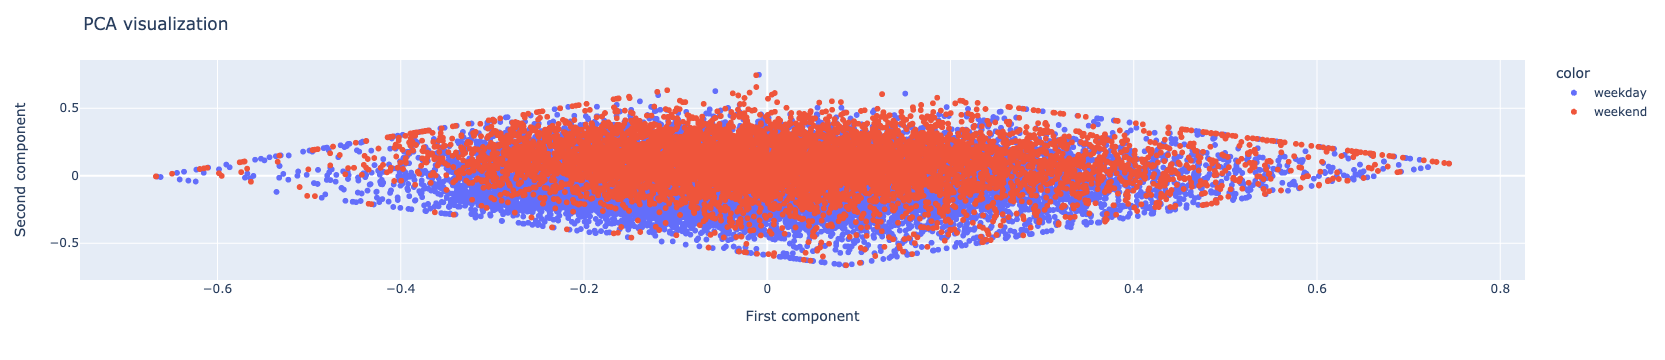

In [45]:
import plotly.express as px

fig = px.scatter(
    x=behavior_vector_pca[:, 0],
    y=behavior_vector_pca[:, 1],
    color=behavior_vector["dayofweek"],
)
fig.update_layout(
    title="PCA visualization",
    xaxis_title="First component",
    yaxis_title="Second component",
)
fig.show()

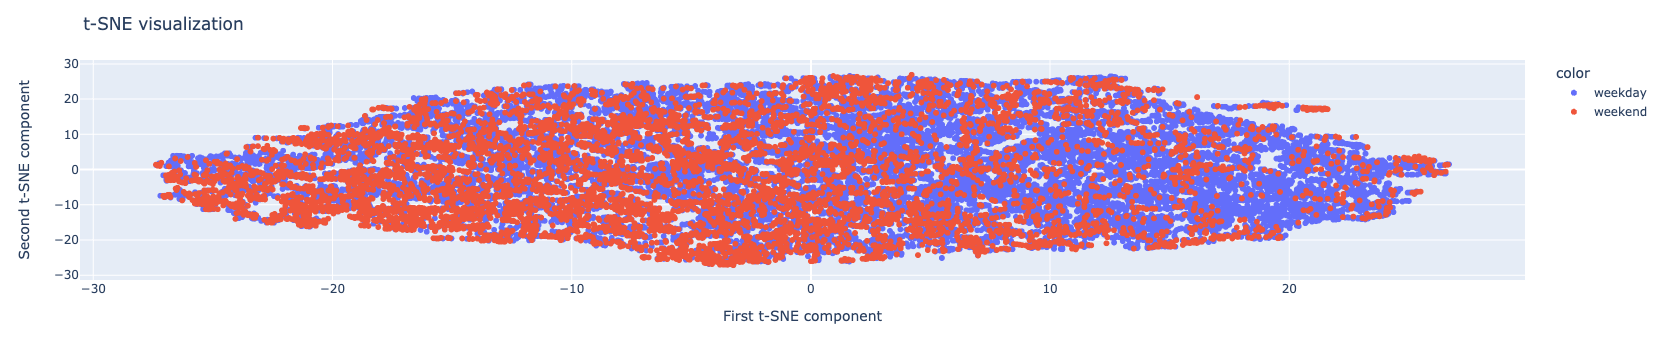

In [40]:
tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
)


behavior_vector_tsne = tsne.fit_transform(behavior_vector[FEATURES])

fig = px.scatter(
    x=behavior_vector_tsne[:, 0],
    y=behavior_vector_tsne[:, 1],
    color=behavior_vector["dayofweek"],
)
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE component",
    yaxis_title="Second t-SNE component",
)
fig.show()

# MOMO

In [14]:
freq = "4epochs"
study = "momo"
with open(f"../config/features.txt") as f:
    features = json.load(f)


FEATURES = features[study][freq]
id_cols = ["user", "device", "group", "date", "dayofweek"]
raw_behavior_vector = pd.read_csv(
    f"/m/cs/work/luongn1/digirhythm/data/processed/momo/vector_momo_{freq}.csv",
    index_col=0,
)

raw_behavior_vector.dropna(subset=FEATURES, inplace=True)
raw_behavior_vector["date"] = pd.to_datetime(raw_behavior_vector["date"])
raw_behavior_vector["dayofweek"] = raw_behavior_vector["date"].apply(
    lambda x: "weekday" if x.weekday() < 5 else "weekend"
)

In [19]:
behavior_vector = raw_behavior_vector[FEATURES + id_cols]

FEATURES

['location:n_sps:norm',
 'location:entropy:norm',
 'location:log_variance:norm',
 'location:proportion_home',
 'application:count:comm:night:norm',
 'application:count:comm:morning:norm',
 'application:count:comm:afternoon:norm',
 'application:count:comm:evening:norm',
 'application:duration:comm:total:norm',
 'screen:screen_use_durationtotal:sum:norm']

In [26]:
tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
)

behavior_vector_tsne = tsne.fit_transform(
    behavior_vector[
        [
            "location:n_sps:norm",
            "location:entropy:norm",
            "location:log_variance:norm",
            "location:proportion_home",
            "screen:screen_use_durationtotal:sum:norm",
        ]
    ]
)


fig = px.scatter(
    x=behavior_vector_tsne[:, 2],
    y=behavior_vector_tsne[:, 0],
    color=behavior_vector["dayofweek"],
)
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [1]:
import pandas as pd
# Check missing data
fp = "/m/cs/work/luongn1/digirhythm/data/interim/momo/location_4epochs.csv"
loc_df = pd.read_csv(fp, index_col=0)

loc_df.dropna(subset=["location:n_bins"])

date        device          user  location:dist_total  \
index                                                                
0      2020-03-05  1YfNysXDlFgA  _swxQrt999Wh            71.781959   
1      2020-03-06  1YfNysXDlFgA  _swxQrt999Wh         28648.370691   
2      2020-03-07  1YfNysXDlFgA  _swxQrt999Wh         61571.901456   
3      2020-03-08  1YfNysXDlFgA  _swxQrt999Wh         36131.548273   
4      2020-03-09  1YfNysXDlFgA  _swxQrt999Wh         29043.869031   
...           ...           ...           ...                  ...   
4363   2021-12-31  zL2u8PjLTiEp  JRmdtSaUsFUc         21629.340298   
4364   2022-01-01  zL2u8PjLTiEp  JRmdtSaUsFUc          2822.835820   
4365   2022-01-02  zL2u8PjLTiEp  JRmdtSaUsFUc          1916.094612   
4366   2022-01-03  zL2u8PjLTiEp  JRmdtSaUsFUc          2670.823648   
4367   2022-01-04  zL2u8PjLTiEp  JRmdtSaUsFUc          8152.715664   

       location:n_bins  location:speed_average  location:speed_variance  \
index                                                                     
0                 35.0                0.094921                 0.081324   
1                 33.0                1.658357                11.305301   
2                 94.0                3.308958                50.263543   
3                102.0                1.664093                15.883845   
4                 39.0                1.234567                 6.738450   
...                ...                     ...                      ...   
4363              86.0                1.434593                 5.131924   
4364              84.0                1.139881                 1.670515   
4365              68.0                1.035735                 0.773663   
4366              86.0                0.989477                 2.435862   
4367              83.0                1.030663                 2.542813   

       location:speed_max  location:variance  location:log_variance  ...  \
index                                                                ...   
0                1.346408       2.283467e-09             -19.897571  ...   
1               13.619089       3.841770e-03              -5.561822  ...   
2               26.685600       2.970338e-02              -3.516494  ...   
3               21.779348       9.015095e-03              -4.708855  ...   
4               10.709632       3.879500e-03              -5.552049  ...   
...                   ...                ...                    ...  ...   
4363            13.150000       5.752862e-04              -7.460643  ...   
4364             7.900000       1.560505e-07             -15.673086  ...   
4365             4.290000       1.008176e-07             -16.109953  ...   
4366            13.160000       1.095102e-07             -16.027248  ...   
4367            12.150000       2.809735e-04              -8.177250  ...   

       location:n_transitions  location:n_top1  location:n_top2  \
index                                                             
0                         0.0             31.0              0.0   
1                         2.0             13.0              5.0   
2                         2.0             16.0              7.0   
3                         1.0             16.0              3.0   
4                         2.0             19.0              3.0   
...                       ...              ...              ...   
4363                      2.0             13.0              4.0   
4364                      0.0             12.0              0.0   
4365                      0.0             17.0              0.0   
4366                      0.0             15.0              0.0   
4367                      4.0             12.0              9.0   

       location:n_top3  location:n_top4  location:n_top5  location:entropy  \
index                                                                        
0                  0.0              0.0              0.0          0.000000   
1                  0.0         

<AxesSubplot:>

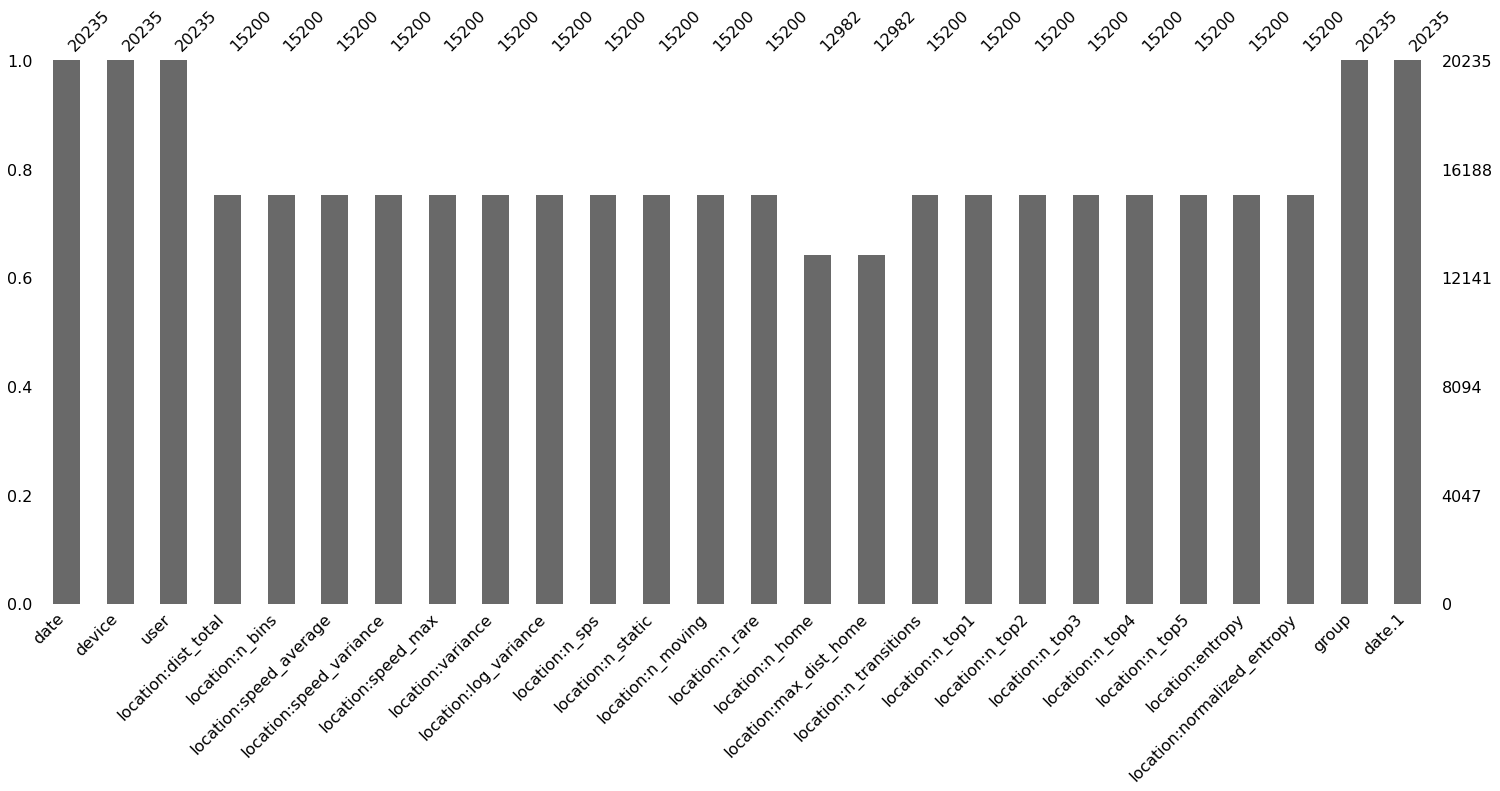

In [2]:
#!pip install missingno
import missingno as msno
import seaborn as sns
msno.bar(loc_df)


In [14]:
uindex = loc_df.copy().set_index('user')
#msno.matrix(uindex)
uindex

date        device  location:dist_total  location:n_bins  \
user                                                                           
_swxQrt999Wh  2020-03-05  1YfNysXDlFgA            71.781959             35.0   
_swxQrt999Wh  2020-03-06  1YfNysXDlFgA         28648.370691             33.0   
_swxQrt999Wh  2020-03-07  1YfNysXDlFgA         61571.901456             94.0   
_swxQrt999Wh  2020-03-08  1YfNysXDlFgA         36131.548273            102.0   
_swxQrt999Wh  2020-03-09  1YfNysXDlFgA         29043.869031             39.0   
...                  ...           ...                  ...              ...   
JRmdtSaUsFUc  2021-12-31  zL2u8PjLTiEp         21629.340298             86.0   
JRmdtSaUsFUc  2022-01-01  zL2u8PjLTiEp          2822.835820             84.0   
JRmdtSaUsFUc  2022-01-02  zL2u8PjLTiEp          1916.094612             68.0   
JRmdtSaUsFUc  2022-01-03  zL2u8PjLTiEp          2670.823648             86.0   
JRmdtSaUsFUc  2022-01-04  zL2u8PjLTiEp          8152.715664             83.0   

              location:speed_average  location:speed_variance  \
user                                                            
_swxQrt999Wh                0.094921                 0.081324   
_swxQrt999Wh                1.658357                11.305301   
_swxQrt999Wh                3.308958                50.263543   
_swxQrt999Wh                1.664093                15.883845   
_swxQrt999Wh                1.234567                 6.738450   
...                              ...                      ...   
JRmdtSaUsFUc                1.434593                 5.131924   
JRmdtSaUsFUc                1.139881                 1.670515   
JRmdtSaUsFUc                1.035735                 0.773663   
JRmdtSaUsFUc                0.989477                 2.435862   
JRmdtSaUsFUc                1.030663                 2.542813   

              location:speed_max  location:variance  location:log_variance  \
user                                                                         
_swxQrt999Wh            1.346408       2.283467e-09             -19.897571   
_swxQrt999Wh           13.619089       3.841770e-03              -5.561822   
_swxQrt999Wh           26.685600       2.970338e-02              -3.516494   
_swxQrt999Wh           21.779348       9.015095e-03              -4.708855   
_swxQrt999Wh           10.709632       3.879500e-03              -5.552049   
...                          ...                ...                    ...   
JRmdtSaUsFUc           13.150000       5.752862e-04              -7.460643   
JRmdtSaUsFUc            7.900000       1.560505e-07             -15.673086   
JRmdtSaUsFUc            4.290000       1.008176e-07             -16.109953   
JRmdtSaUsFUc           13.160000       1.095102e-07             -16.027248   
JRmdtSaUsFUc           12.150000       2.809735e-04              -8.177250   

              location:n_sps  ...  location:n_transitions  location:n_top1  \
user                          ...                                            
_swxQrt999Wh             1.0  ...                     0.0             31.0   
_swxQrt999Wh             1.0  ...                     2.0             13.0   
_swxQrt999Wh             2.0  ...                     2.0             16.0   
_swxQrt999Wh             1.0  ...                     1.0             16.0   
_swxQrt999Wh             1.0  ...                     2.0             19.0   
...                      ...  ...                     ...              ...   
JRmdtSaUsFUc             1.0  ...                     2.0             13.0   
JRmdtSaUsFUc             1.0  ...                     0.0             12.0   
JRmdtSaUsFUc             1.0  ...                     0.0             17.0   
JRmdtSaUsFUc             1.0  ...                     0.0             15.0   
JRmdtSaUsFUc             2.0  ...                     4.0             12.0   

              location:n_top2  location:n_top3  location:n_top4  \
user                                

user        group  location:dist_total
0    _swxQrt999Wh      mmm-bpd             0.946612
1    IZr3eFPWcYod  mmm-control             0.928375
2    vC2-2ajT7-1L      mmm-mdd             0.923077
3    U5cKPUTMu0fs      mmm-mdd             0.914286
4    RazDc_79nWZc      mmm-mdd             0.908257
..            ...          ...                  ...
114  G96iHU6Pr69i  mmm-control             0.000000
115  lzCmb_dbsPmO  mmm-control             0.000000
116  EsgBr1bwAc8a      mmm-mdd             0.000000
117  QvjcDKzUYGbN  mmm-control             0.000000
118  zVn4Ri3rADQI       mmm-bd             0.000000

[119 rows x 3 columns]

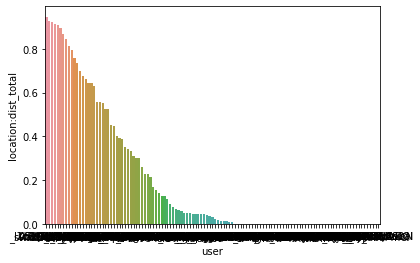

In [3]:

# Calculate the proportion of missing data by 'user' and 'group'
missing_proportion = loc_df.groupby(['user', 'group']).apply(lambda x: x.isnull().mean())['location:dist_total'].sort_values(ascending=False).reset_index()

# Adjust display options
pd.set_option('display.max_rows', 50)  # Adjust as needed
sns.barplot(y=missing_proportion['location:dist_total'], x=missing_proportion.user)
missing_proportion

In [43]:
missing_proportion[missing_proportion['location:dist_total'] > 0.2]

user        group  location:dist_total
0   _swxQrt999Wh      mmm-bpd             0.946612
1   IZr3eFPWcYod  mmm-control             0.928375
2   vC2-2ajT7-1L      mmm-mdd             0.923077
3   U5cKPUTMu0fs      mmm-mdd             0.914286
4   RazDc_79nWZc      mmm-mdd             0.908257
5   o67VPudEvTUh  mmm-control             0.895349
6   6t6vo19UzH3U      mmm-mdd             0.865900
7   0xNpSktSAvGC      mmm-mdd             0.846154
8   5U61OcE1cgW_       mmm-bd             0.814815
9   B_Im_-jpBQUk      mmm-bpd             0.796117
10  Xg-KpXjUe4mI       mmm-bd             0.758242
11  OP_J184Pjo-u  mmm-control             0.737288
12  lvDe4shcgoHW      mmm-mdd             0.699324
13  HDpA00dUifZ5       mmm-bd             0.674847
14  zO6UTTlQxLNJ      mmm-mdd             0.662420
15  SK80lPsgpYX3      mmm-bpd             0.644444
16  pmJ-knUGHbqs      mmm-mdd             0.643243
17  RO9MDopzUfHo      mmm-bpd             0.628571
18  SATFc0U1XHrJ      mmm-bpd             0.556962
19  wAzQNrdKZZax      mmm-bpd             0.555556
20  RVjtsqp3YdQY      mmm-bpd             0.553914
21  h6KFa_PDaACP      mmm-mdd             0.526316
22  lb983ODxEFUD      mmm-bpd             0.522936
23  2NtvG4WqOd1S      mmm-mdd             0.452830
24  OGyBAH59J-Wt       mmm-bd             0.447368
25  bfURzicgUZB6       mmm-bd             0.400000
26  5DWiLmu6c6u7  mmm-control             0.394118
27  sr_IriQZ3z4W      mmm-mdd             0.387097
28  75wfB613llIF      mmm-mdd             0.352332
29  rkFen2Hs6Lbo      mmm-bpd             0.343750
30  p4Vfk9051RL9      mmm-mdd             0.335196
31  L7VskiPwLo54  mmm-control             0.309524
32  pu8i4FBr2FYV      mmm-bpd             0.303030
33  dABMUddbdoar  mmm-control             0.299320
34  Z750C1y6MME4      mmm-mdd             0.260331
35  lMmhJTDCgm3t      mmm-mdd             0.227891
36  wuYxxSDu6JY4      mmm-mdd             0.225926
37  pWvgwtV_oAb2       mmm-bd             0.213115